# read SolO cdf data, convert and plot




In [1]:
import numpy as np
import scipy.io
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import  DateFormatter
from datetime import timedelta
from datetime import timezone
import pytz


import seaborn as sns
import datetime
import astropy
import astropy.constants as const
from sunpy.time import parse_time
import time
import pickle

import sys
import os
import urllib
import json
import importlib
import pandas as pd
import copy
import openpyxl
import h5py
import heliopy.data.spice as spicedata
import heliopy.spice as spice

import spiceypy

import warnings
warnings.filterwarnings('ignore')


import heliosat


from heliocats import plot as hp
importlib.reload(hp) #reload again while debugging

from heliocats import data as hd
importlib.reload(hd) #reload again while debugging

from heliocats import cats as hc
importlib.reload(hc) #reload again while debugging

from heliocats import stats as hs
importlib.reload(hs) #reload again while debugging

#where the in situ data files are located is read 
#from config.py 
import config
importlib.reload(config)
from config import data_path
from config import data_path_ML


########### make directories first time if not there

resdir='results'
if os.path.isdir(resdir) == False: os.mkdir(resdir)

datadir='data'
if os.path.isdir(datadir) == False: os.mkdir(datadir)

indexdir='icmecat/indices_icmecat' 
if os.path.isdir(indexdir) == False: os.mkdir(indexdir) 

catdir='icmecat'
if os.path.isdir(catdir) == False: os.mkdir(catdir)

icplotsdir='icmecat/plots_icmecat/' 
if os.path.isdir(icplotsdir) == False: os.mkdir(icplotsdir) 

plt.rcParams["figure.figsize"] = (15,5)


from astropy.constants import au
#define AU in km
AU=au.value/1e3
print(heliosat.__version__)
print(spiceypy.__version__)

import cdflib

print('done')


0.6.2
5.1.2
done


### read SolO/SWA plasma data (science level 2) - use case 2022 Sep 5 CME

done
{'Item_Size': 4, 'Data_Type': 'CDF_CHAR', 'Num_Items': 1, 'Data': 'km/s'}
{'Item_Size': 15, 'Data_Type': 'CDF_CHAR', 'Num_Items': 1, 'Data': 'particles cm^-3'}
{'Item_Size': 2, 'Data_Type': 'CDF_CHAR', 'Num_Items': 1, 'Data': 'eV'}


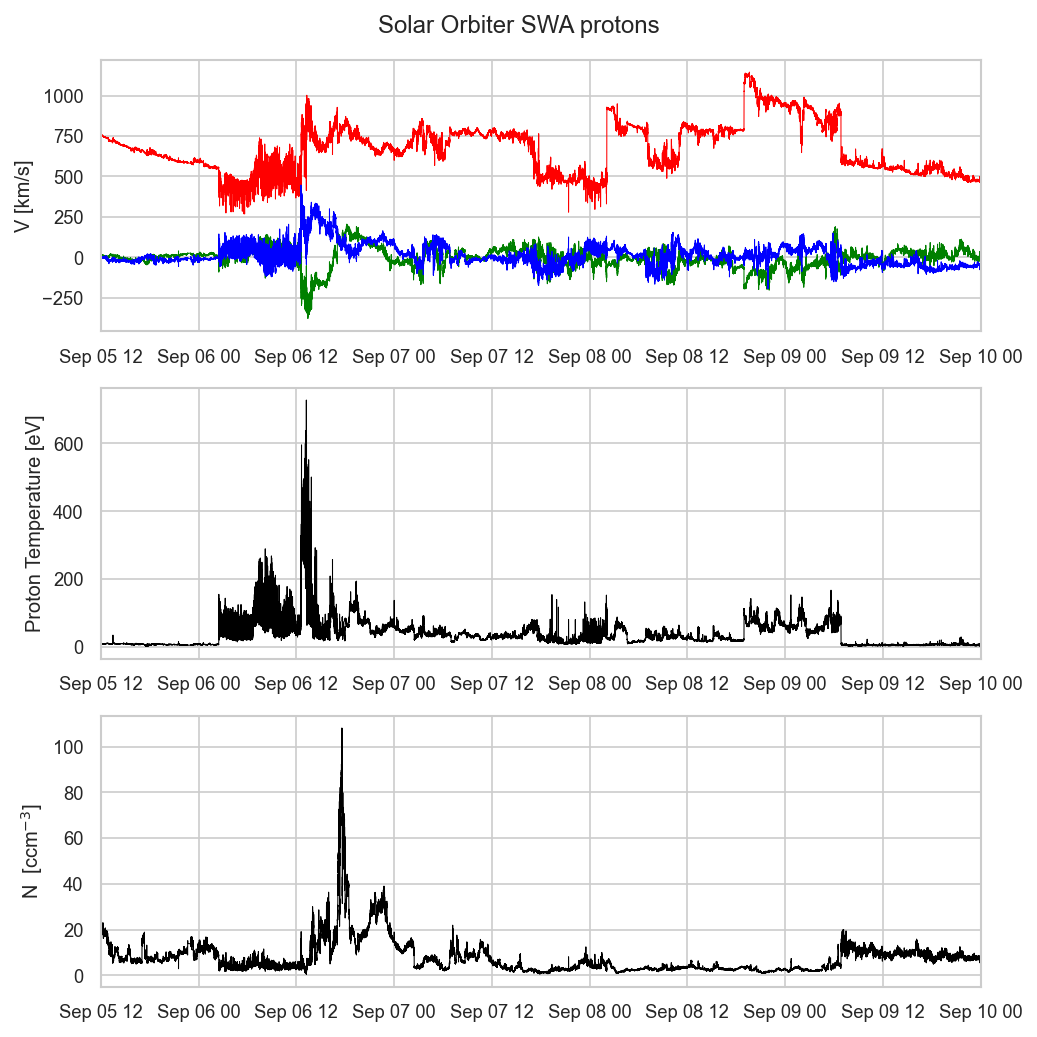

In [69]:
sns.set_style('whitegrid')
sns.set_context('paper')

#locally on Macbook
ll_path = "data/solo_swa_2022sep"

files = os.listdir(ll_path)
files.sort()
llfiles = [os.path.join(ll_path, f) for f in files]
#print(llfiles)

time=np.zeros(0,dtype=[('time',object)])
den=np.zeros(0)
temp=np.zeros(0)
vr=np.zeros(0)
vt=np.zeros(0)
vn=np.zeros(0)



for i in np.arange(0,len(llfiles)):
    p1 = cdflib.CDF(llfiles[i])
    #p1.cdf_info()


    den1=p1.varget('N')
    speed1=p1.varget('V_RTN')
    temp1=p1.varget('T')

    vr1=speed1[:,0]
    vt1=speed1[:,1]
    vn1=speed1[:,2]
    
    vr=np.append(vr1,vr)
    vt=np.append(vt1,vt)
    vn=np.append(vn1,vn)
    
    
    temp=np.append(temp1,temp)
    den=np.append(den1,den)

    
    time1=p1.varget('EPOCH')
    t1=parse_time(cdflib.cdfastropy.convert_to_astropy(time1, format=None)).datetime
    time=np.append(time,t1)
    #print(time1)




plt.figure(1,figsize=(7,7),dpi=150)

ax1 = plt.subplot(311) 

plt.suptitle('Solar Orbiter SWA protons')
plt.plot(time, vr, 'r',lw=0.5)
plt.plot(time, vt, 'g',lw=0.5)
plt.plot(time, vn, 'b',lw=0.5)
plt.ylabel('V [km/s]')

ax2 = plt.subplot(312) 
plt.plot(time, temp, 'k', lw=0.5)
plt.ylabel('Proton Temperature [eV]')

ax3 = plt.subplot(313) 
plt.plot(time, den, 'k', lw=0.5)
plt.ylabel(r'N  [ccm$^{-3}$]')


plotstart=datetime.datetime(2022,9,5,12)
plotend=datetime.datetime(2022,9,10,0)
ax1.set_xlim(plotstart,plotend)
ax2.set_xlim(plotstart,plotend)
ax3.set_xlim(plotstart,plotend)

date_form = DateFormatter("%h %d %H")
ax1.xaxis.set_major_formatter(date_form)
ax2.xaxis.set_major_formatter(date_form)
ax3.xaxis.set_major_formatter(date_form)


plt.tight_layout()



plt.savefig('lineups/solo_2022_sep_plasma.png')
plt.savefig('lineups/solo_2022_sep_plasma.pdf')



print('done')

print(p1.attget('UNITS','V_RTN'))
print(p1.attget('UNITS','N'))
print(p1.attget('UNITS','T'))



### read SolO MAG data (low latency) - use case 2022 Sep 5 CME

In [48]:
sns.set_style('whitegrid')
sns.set_context('paper')


#locally on Macbook
ll_path = "data/solo_mag_2022sep"
#ll_path = "/nas/helio/data/SolarOrbiter/MAG/low_latency/"

files = os.listdir(ll_path)
files.sort()
llfiles = [os.path.join(ll_path, f) for f in files]
print(llfiles)

br1=np.zeros(0)
bt1=np.zeros(0)
bn1=np.zeros(0)
time1=np.zeros(0,dtype=[('time',object)])


for i in np.arange(0,len(llfiles)):
    m1 = cdflib.CDF(llfiles[i])
    #print(m1.cdf_info())


    b=m1.varget('B_RTN')
    br=b[:,0]
    bt=b[:,1]
    bn=b[:,2]
    
    br1=np.append(br1,br)
    bt1=np.append(bt1,bt)
    bn1=np.append(bn1,bn)

    time=m1.varget('EPOCH')

    t1=parse_time(cdflib.cdfastropy.convert_to_astropy(time, format=None)).datetime
    time1=np.append(time1,t1)
    

solo_ll=np.zeros(np.size(time1),dtype=[('time',object),('bx', float),('by', float),\
            ('bz', float),('bt', float),('r', float),('lat', float),('lon', float),('x', float),('y', float),('z', float)])   
solo_ll = solo_ll.view(np.recarray)  

solo_ll.time=time1
solo_ll.bx=br1
solo_ll.by=bt1
solo_ll.bz=bn1
solo_ll.bt=np.sqrt(br1**2+bt1**2+bn1**2)

#print(m1.attget('UNITS','V_RTN'))
#print(m1.attget('UNITS','N'))
#print(m1.attget('UNITS','T'))

#solo_pos=heliosat.SOLO().trajectory(solo_ll.time,reference_frame="HEEQ")
#solo_ll.x=solo_pos[:,0]
#solo_ll.y=solo_pos[:,1]
#solo_ll.z=solo_pos[:,2]
#[solo_ll.r, solo_ll.lat, solo_ll.lon]=hd.cart2sphere(solo_pos[:,0],solo_pos[:,1],solo_pos[:,2])
#solo_ll.lon=np.rad2deg(solo_ll.lon) #convert to degree
#solo_ll.lat=np.rad2deg(solo_ll.lat)


#filename='solo_2021_2022_lowlat_nopos_new.p'
#äpickle.dump(solo_ll, open(data_path+filename, "wb"))

['data/solo_mag_2022sep/.DS_Store', 'data/solo_mag_2022sep/solo_LL02_mag_20220831T000215-20220901T000214_V02C.cdf', 'data/solo_mag_2022sep/solo_LL02_mag_20220901T000215-20220902T000214_V02C.cdf', 'data/solo_mag_2022sep/solo_LL02_mag_20220902T000215-20220903T000215_V04I.cdf', 'data/solo_mag_2022sep/solo_LL02_mag_20220903T000216-20220904T000215_V04I.cdf', 'data/solo_mag_2022sep/solo_LL02_mag_20220904T000216-20220905T000215_V04I.cdf', 'data/solo_mag_2022sep/solo_LL02_mag_20220905T000216-20220906T000215_V04I.cdf', 'data/solo_mag_2022sep/solo_LL02_mag_20220906T000216-20220907T000215_V03C.cdf', 'data/solo_mag_2022sep/solo_LL02_mag_20220907T000216-20220908T000215_V03C.cdf', 'data/solo_mag_2022sep/solo_LL02_mag_20220908T000216-20220909T000216_V02C.cdf', 'data/solo_mag_2022sep/solo_LL02_mag_20220909T000217-20220910T000216_V03C.cdf', 'data/solo_mag_2022sep/solo_LL02_mag_20220910T000217-20220911T000216_V03C.cdf', 'data/solo_mag_2022sep/solo_LL02_mag_20220911T000217-20220912T000216_V02C.cdf', 'dat

OSError: /Users/chris/python/heliocats/data/solo_mag_2022sep/.DS_Store is not a CDF file or a non-supported CDF!

In [35]:
br1=np.zeros(0)
bt1=np.zeros(0)
bn1=np.zeros(0)
time1=np.zeros(0,dtype=[('time',object)])


for i in np.arange(0,len(llfiles)):
    m1 = cdflib.CDF(llfiles[i])
    #print(m1.cdf_info())


    b=m1.varget('B_RTN')
    br=b[:,0]
    bt=b[:,1]
    bn=b[:,2]
    
    br1=np.append(br1,br)
    bt1=np.append(bt1,bt)
    bn1=np.append(bn1,bn)

    time=m1.varget('EPOCH')

    t1=parse_time(cdflib.cdfastropy.convert_to_astropy(time, format=None)).datetime
    time1=np.append(time1,t1)
    

solo_ll=np.zeros(np.size(time1),dtype=[('time',object),('bx', float),('by', float),\
            ('bz', float),('bt', float),('r', float),('lat', float),('lon', float),('x', float),('y', float),('z', float)])   
solo_ll = solo_ll.view(np.recarray)  

solo_ll.time=time1
solo_ll.bx=br1
solo_ll.by=bt1
solo_ll.bz=bn1
solo_ll.bt=np.sqrt(br1**2+bt1**2+bn1**2)

#solo_pos=heliosat.SOLO().trajectory(solo_ll.time,reference_frame="HEEQ")
#solo_ll.x=solo_pos[:,0]
#solo_ll.y=solo_pos[:,1]
#solo_ll.z=solo_pos[:,2]
#[solo_ll.r, solo_ll.lat, solo_ll.lon]=hd.cart2sphere(solo_pos[:,0],solo_pos[:,1],solo_pos[:,2])
#solo_ll.lon=np.rad2deg(solo_ll.lon) #convert to degree
#solo_ll.lat=np.rad2deg(solo_ll.lat)


#filename='solo_2021_2022_lowlat_nopos_new.p'
#äpickle.dump(solo_ll, open(data_path+filename, "wb"))

ValueError: Variable name 'B_RTN' not found.

In [64]:
den=np.zeros(0)
temp=np.zeros(0)
speed=np.zeros(0)
time1=np.zeros(0,dtype=[('time',object)])


for i in np.arange(0,len(llfiles)):
    m1 = cdflib.CDF(llfiles[i])
    #print(m1.cdf_info())


    b=m1.varget('B_RTN')
    br=b[:,0]
    bt=b[:,1]
    bn=b[:,2]
    
    br1=np.append(br1,br)
    bt1=np.append(bt1,bt)
    bn1=np.append(bn1,bn)

    time=m1.varget('EPOCH')

    t1=parse_time(cdflib.cdfastropy.convert_to_astropy(time, format=None)).datetime
    time1=np.append(time1,t1)
    

solo_ll=np.zeros(np.size(time1),dtype=[('time',object),('bx', float),('by', float),\
            ('bz', float),('bt', float),('r', float),('lat', float),('lon', float),('x', float),('y', float),('z', float)])   
solo_ll = solo_ll.view(np.recarray)  

solo_ll.time=time1
solo_ll.bx=br1
solo_ll.by=bt1
solo_ll.bz=bn1
solo_ll.bt=np.sqrt(br1**2+bt1**2+bn1**2)

ValueError: Variable name 'B_RTN' not found.

## read low latency data for quicklook

In [5]:
sns.set_style('whitegrid')
sns.set_context('paper')

ll_path = "/nas/helio/data/SolarOrbiter/MAG/low_latency/"

files = os.listdir(ll_path)
files.sort()
llfiles = [os.path.join(ll_path, f) for f in files]
#print(llfiles)


br1=np.zeros(0)
bt1=np.zeros(0)
bn1=np.zeros(0)
time1=np.zeros(0,dtype=[('time',object)])


for i in np.arange(0,len(llfiles)):
    m1 = cdflib.CDF(llfiles[i])
    #print(m1.cdf_info())


    b=m1.varget('B_RTN')
    br=b[:,0]
    bt=b[:,1]
    bn=b[:,2]
    
    br1=np.append(br1,br)
    bt1=np.append(bt1,bt)
    bn1=np.append(bn1,bn)

    time=m1.varget('EPOCH')

    t1=parse_time(cdflib.cdfastropy.convert_to_astropy(time, format=None)).datetime
    time1=np.append(time1,t1)
    

solo_ll=np.zeros(np.size(time1),dtype=[('time',object),('bx', float),('by', float),\
            ('bz', float),('bt', float),('r', float),('lat', float),('lon', float),('x', float),('y', float),('z', float)])   
solo_ll = solo_ll.view(np.recarray)  

solo_ll.time=time1
solo_ll.bx=br1
solo_ll.by=bt1
solo_ll.bz=bn1
solo_ll.bt=np.sqrt(br1**2+bt1**2+bn1**2)



solo_pos=heliosat.SOLO().trajectory(solo_ll.time,reference_frame="HEEQ")
solo_ll.x=solo_pos[:,0]
solo_ll.y=solo_pos[:,1]
solo_ll.z=solo_pos[:,2]
[solo_ll.r, solo_ll.lat, solo_ll.lon]=hd.cart2sphere(solo_pos[:,0],solo_pos[:,1],solo_pos[:,2])
solo_ll.lon=np.rad2deg(solo_ll.lon) #convert to degree
solo_ll.lat=np.rad2deg(solo_ll.lat)


filename='solo_2021_2022_lowlat_nopos_new.p'
pickle.dump(solo_ll, open(data_path+filename, "wb"))
        

load Solar Orbiter lowlat RTN 


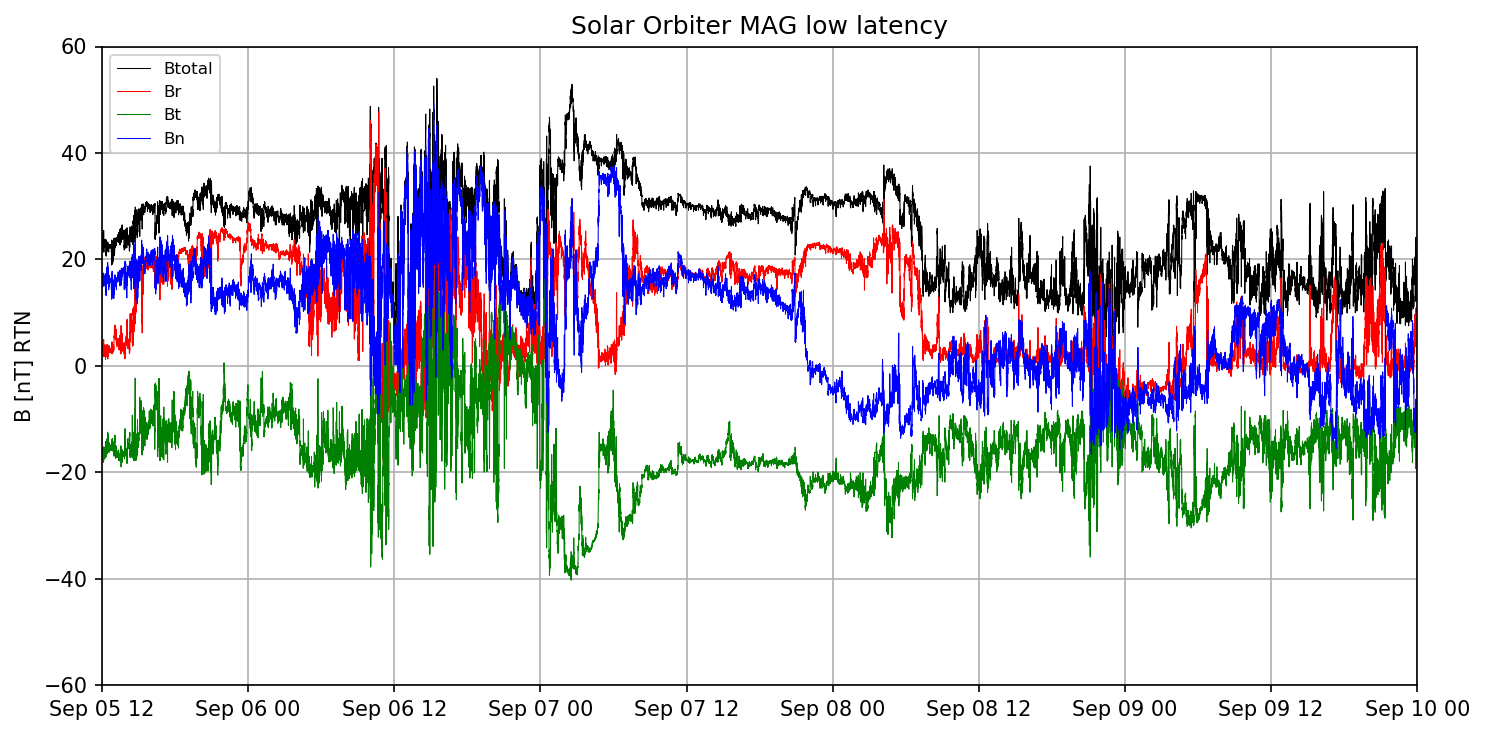

In [4]:
print('load Solar Orbiter lowlat RTN ')
filename='solo_2021_2022_lowlat_nopos_new.p'
solo_ll=pickle.load(open(data_path+filename, "rb" ) )  

plt.figure(1,figsize=(10,5),dpi=150)


ax1 = plt.subplot(111) 
ax1.plot(solo_ll.time,solo_ll.bt,color='black',lw=0.5, label='Btotal')
ax1.plot(solo_ll.time,solo_ll.bx, color='r',lw=0.5,label='Br')
ax1.plot(solo_ll.time,solo_ll.by,color='g',lw=0.5,label='Bt')
ax1.plot(solo_ll.time,solo_ll.bz,color='b',lw=0.5,label='Bn')

ax1.set_ylim(-60,60)
    
plotstart=datetime.datetime(2022,9,5,12)
plotend=datetime.datetime(2022,9,10,0)
ax1.set_xlim(plotstart,plotend)
plt.legend(loc=2,fontsize=8)
plt.ylabel('B [nT] RTN')
plt.title('Solar Orbiter MAG low latency')
plt.grid('on')

date_form = DateFormatter("%h %d %H")
ax1.xaxis.set_major_formatter(date_form)

plt.tight_layout()

plt.savefig('lineups/solo_2022_sep_lowlat.png')
plt.savefig('lineups/solo_2022_sep_lowlat.pdf')

In [ ]:
#read SWA moments

#  if os.path.exists(sta_impact_path+cdf_file):
            print(cdf_file)
            f1 = cdflib.CDF(sta_impact_path+cdf_file)
            t1=parse_time(f1.varget('Epoch'),format='cdf_epoch').datetime
            t2.extend(t1)
            bfield=f1.varget('BFIELD')
            bt[i:i+len(bfield[:,3])]=bfield[:,3]
            bx[i:i+len(bfield[:,0])]=bfield[:,0]
            by[i:i+len(bfield[:,1])]=bfield[:,1]
            bz[i:i+len(bfield[:,2])]=bfield[:,2]
            i=i+len(bfield[:,3])

## read all public SolO MAG data from 2020 June 1 and convert to recarray and to other coordinate systems


In [4]:
#normal time resolution
#DATAPATH = "/nas/helio/data/SolarOrbiter/MAG/level2/mag_rtn_norm"

#1 minute time resolution
DATAPATH = "/nas/helio/data/SolarOrbiter/MAG/level2/mag_rtn_norm_1min"

class SOLO_EXT(heliosat.SOLO):
    
    #def get_data_files(self, *args):
    def get_data_files(self, *args, **kwargs):
        files = os.listdir(DATAPATH)
        files.sort()

        files = [os.path.join(DATAPATH, f) for f in files]
        #print(files)
        return files, [self.get_data_version("mag", datetime.datetime.now().replace(tzinfo=datetime.timezone.utc))] * len(files)

a = SOLO_EXT()

get data


failed to fetch url "http://soar.esac.esa.int/soar-sl-tap/data?retrieval_type=LAST_PRODUCT&data_item_id=solo_L2_mag-rtn-normal-1-minute_20200814&product_type=SCIENCE" (404)
NoneType: None
failed to fetch data file "data?retrieval_type=LAST_PRODUCT&data_item_id=solo_L2_mag-rtn-normal-1-minute_20200814&product_type=SCIENCE" (versions: ['VXX', 'V03', 'V02', 'V01', 'LL'])
NoneType: None
failed to fetch url "http://soar.esac.esa.int/soar-sl-tap/data?retrieval_type=LAST_PRODUCT&data_item_id=solo_L2_mag-rtn-normal-1-minute_20200815&product_type=SCIENCE" (404)
NoneType: None
failed to fetch data file "data?retrieval_type=LAST_PRODUCT&data_item_id=solo_L2_mag-rtn-normal-1-minute_20200815&product_type=SCIENCE" (versions: ['VXX', 'V03', 'V02', 'V01', 'LL'])
NoneType: None
failed to fetch url "http://soar.esac.esa.int/soar-sl-tap/data?retrieval_type=LAST_PRODUCT&data_item_id=solo_L2_mag-rtn-normal-1-minute_20200818&product_type=SCIENCE" (404)
NoneType: None
failed to fetch data file "data?retrieva

interpolate


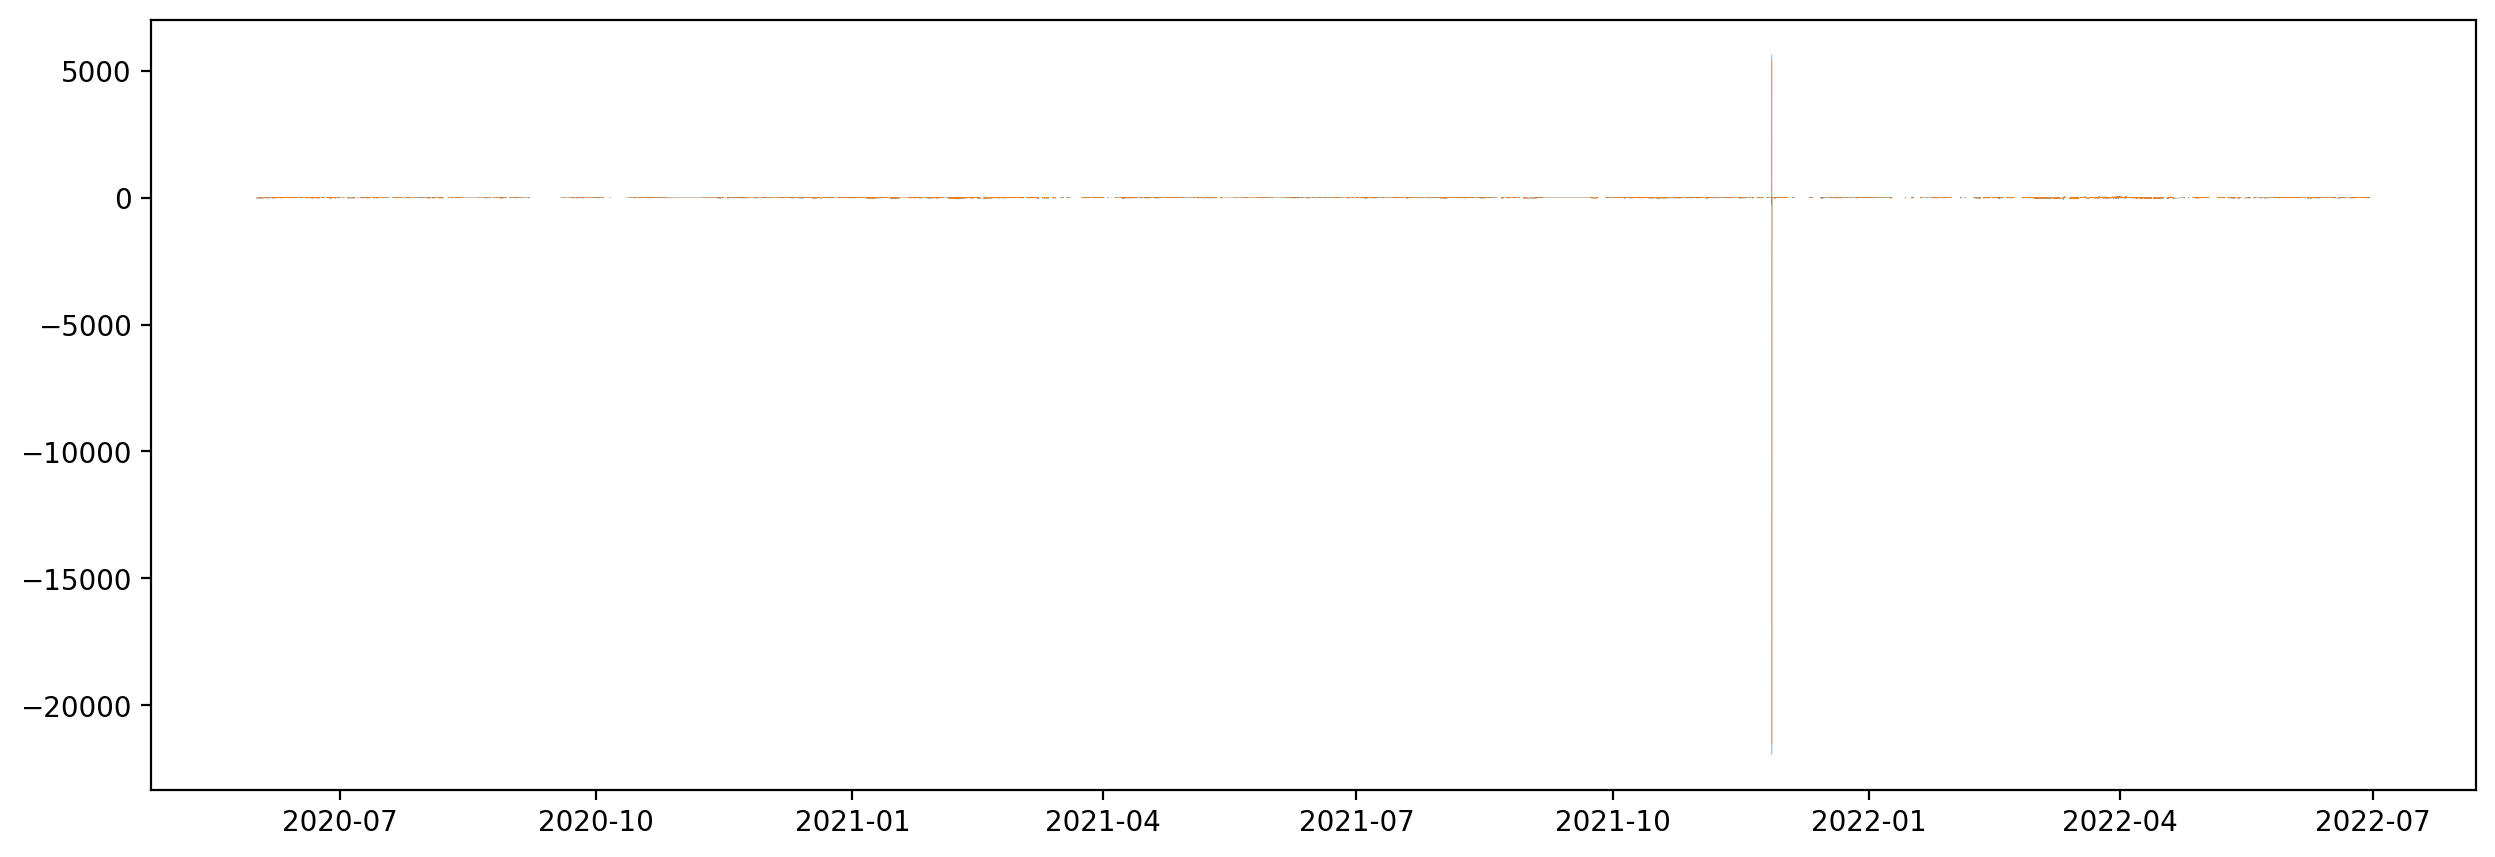

In [5]:
#old total_days=90 time = [datetime.datetime(2020, 6, 1) + datetime.timedelta(minutes=i) for i in range(total_days * 24 * 60 )]

#time with utc timezone
#t_solort=datetime.datetime(2020, 6,1,tzinfo=datetime.timezone.utc)
#t_end=datetime.datetime(2020, 12, 31,tzinfo=datetime.timezone.utc)

t_solort=datetime.datetime(2020, 6,1)
t_end=datetime.datetime(2022, 6, 30)

#make 1 min datetimes
t_solort1=copy.deepcopy(t_solort)
time_1=[]
while t_solort1 < t_end:
    time_1.append(t_solort1)  
    t_solort1 += datetime.timedelta(minutes=1)

time_mat=mdates.date2num(time_1) 

#_, b_soio = SOIO_EXT().get_data(t_soio, "mag", frame="HEEQ")

# t_soio = [datetime.datetime(2020, 5, 27) + datetime.timedelta(hours=i) for i in range(24 * 7)]
# _, b_soio = SOIO_EXT().get_data(t_soio, "mag", frame="HEEQ", cache=True, smoothing="kernel",
#                                 smoothing_scale=240, remove_nans=True)

print('get data')
t2, b_soio = SOLO_EXT().get_data(time_1, "mag")#,frame='HEEQ')
t1=parse_time(t2,format='unix').datetime
tm_mat=mdates.date2num(t1) 

smag=np.zeros(np.size(time_1),dtype=[('time',object),('bx', float),('by', float),\
        ('bz', float),('bt', float),\
        ('vt', float),('np', float), ('tp', float),\
                                   ('x', float),('y', float),('z', float),\
        ('r', float),('lat', float),('lon', float)])  
smag = smag.view(np.recarray) 

print('interpolate')
smag.time=time_1
smag.bx = np.interp(time_mat, tm_mat, b_soio[:, 0])
smag.by = np.interp(time_mat, tm_mat, b_soio[:, 1])
smag.bz = np.interp(time_mat, tm_mat, b_soio[:, 2])
smag.bt =np.sqrt(smag.bx**2+smag.by**2+smag.bz**2)

#round first each original time to full minutes
#tround=copy.deepcopy(t1)
#format_str = '%Y-%m-%d %H:%M'  
#for k in np.arange(np.size(t2)):     
    #tround[k] = datetime.datetime.strptime(datetime.datetime.strftime(t1[k], format_str), format_str) 
#tm_round=parse_time(tround).plot_date

#isin=np.isin(time_mat,tm_round)      
#setnan=np.where(isin==False)
#set to nan that is not in original data
#smag.bx[setnan]=np.nan
#smag.by[setnan]=np.nan
#smag.bz[setnan]=np.nan
#smag.bt = np.sqrt(smag.bx**2+smag.by**2+smag.bz**2)



plt.figure(1,dpi=200)
plt.plot(tm_mat, b_soio[:, 0],lw=0.1)
plt.plot(smag.time, smag.bx,lw=0.1)

## set data gaps to NaN, remove spikes if necessary

In [6]:
#nan intervals

nt1=parse_time('2020-08-13T21:35Z').datetime 
nt2=parse_time('2020-08-19T12:45Z').datetime
gapind1=np.where(np.logical_and(smag.time > nt1,smag.time < nt2 ))[0]

nt1=parse_time('2020-09-06T23:56Z').datetime 
nt2=parse_time('2020-09-25T00:00Z').datetime
gapind2=np.where(np.logical_and(smag.time > nt1,smag.time < nt2 ))[0]

nt1=parse_time('2020-10-27T23:58Z').datetime 
nt2=parse_time('2020-11-07T00:00Z').datetime
gapind3=np.where(np.logical_and(smag.time > nt1,smag.time < nt2 ))[0]

nt1=parse_time('2020-11-14T23:57Z').datetime 
nt2=parse_time('2020-11-25T00:00Z').datetime
gapind4=np.where(np.logical_and(smag.time > nt1,smag.time < nt2 ))[0]


nt1=parse_time('2021-01-17T20:50Z').datetime 
nt2=parse_time('2021-01-21T00:09Z').datetime
gapind5=np.where(np.logical_and(smag.time > nt1,smag.time < nt2 ))[0]



nt1=parse_time('2021-09-5T17:10Z').datetime 
nt2=parse_time('2021-09-23T00:00Z').datetime
gapind6=np.where(np.logical_and(smag.time > nt1,smag.time < nt2 ))[0]

#Earth flyby?
nt1=parse_time('2021-11-27T02:00Z').datetime 
nt2=parse_time('2021-11-27T08:00Z').datetime
gapind7=np.where(np.logical_and(smag.time > nt1,smag.time < nt2 ))[0]

nt1=parse_time('2022-04-20T11:02Z').datetime 
nt2=parse_time('2022-04-24T00:03Z').datetime
gapind8=np.where(np.logical_and(smag.time > nt1,smag.time < nt2 ))[0]



smag.bt[np.hstack([gapind1,gapind2,gapind3,gapind4,gapind5,gapind6,gapind7, gapind8])]=np.nan
smag.bx[np.hstack([gapind1,gapind2,gapind3,gapind4,gapind5,gapind6,gapind7, gapind8])]=np.nan
smag.by[np.hstack([gapind1,gapind2,gapind3,gapind4,gapind5,gapind6,gapind7, gapind8])]=np.nan
smag.bz[np.hstack([gapind1,gapind2,gapind3,gapind4,gapind5,gapind6,gapind7, gapind8])]=np.nan



In [9]:
#time_1[0:10]
smag.time[0:10]
smag.bx

array([-9.18922997, -9.10792018, -8.92933416, ...,  3.66868693,
        3.40793914,  3.27756524])

In [10]:
print('Solo position')

#with heliopy #add position
#frame='HEEQ'
#spice.furnish(spicedata.get_kernel('solo_2020'))
#solo=spice.Trajectory('Solar Orbiter')
#solo.generate_positions(smag.time, 'Sun',frame)
#solo.change_units(astropy.units.AU)
#[smag.r, smag.lat, smag.lon]=hd.cart2sphere(solo.x,solo.y,solo.z)
#smag.lon=np.rad2deg(smag.lon) #convert to degree
#smag.lat=np.rad2deg(smag.lat)


#heliosat 0.6.2 -> does not know frame keyword
solo_pos=heliosat.SOLO().trajectory(time_1, reference_frame="HEEQ")
smag.x=solo_pos[:,0]
smag.y=solo_pos[:,1]
smag.z=solo_pos[:,2]
[smag.r, smag.lat, smag.lon]=hd.cart2sphere(solo_pos[:,0],solo_pos[:,1],solo_pos[:,2])



print(smag.r)
print(smag.lon)
print(smag.lat)


#print("solo lon: ", np.arctan2(solo_pos[1][0], solo_pos[0][0]) * 360 / 2 / np.pi)
#print("solo lat: ", np.arctan2(solo_pos[2][0], solo_pos[0][0]) * 360 / 2 / np.pi)


print('done')

Solo position
[0.54934047 0.54933743 0.54933438 ... 1.01365347 1.01365392 1.01365437]
[0.5846403  0.58466135 0.58468241 ... 2.74767567 2.74767228 2.7476689 ]
[0.07923522 0.07923801 0.07924079 ... 0.01074045 0.01073984 0.01073923]
done


In [11]:
#------------------------------------- save

fname='solo_2020_jun_2022_jun'

filemag=data_path+fname+'_rtn.p'
pickle.dump(smag, open(filemag, "wb"))

solo_sceq=hd.convert_RTN_to_SCEQ(smag,'SolO')
filemag=data_path+fname+'_sceq.p'
pickle.dump(solo_sceq, open(filemag, "wb"))

solo_heeq=hd.convert_RTN_to_HEEQ(smag,'SolO')
filemag=data_path+fname+'_heeq.p'
pickle.dump(solo_heeq, open(filemag, "wb"))

solo_gse=hd.convert_HEEQ_to_GSE(solo_heeq)
filemag=data_path+fname+'_gse.p'
pickle.dump(solo_gse, open(filemag, "wb"))

print('done')

RTN to SCEQ
conversion RTN to HEEQ
conversion RTN to HEEQ done
conversion HEEQ to GSE
conversion HEEQ to GSE done
done


## read final SOLO CSV data for April event 

Solo position
done


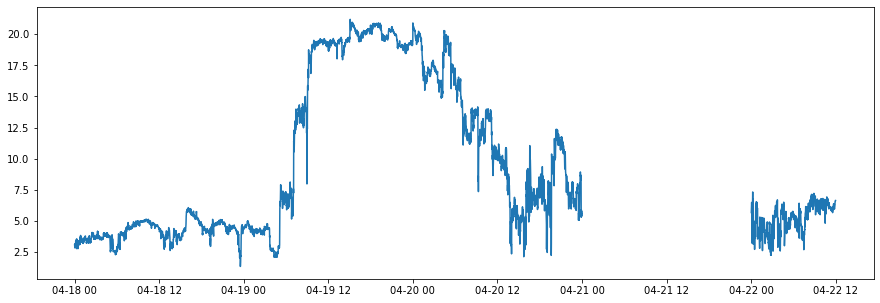

In [12]:
#1 minute time resolution
DATAPATH = "/nas/helio/data/SolarOrbiter/MAG/level2/"
file='mag_data_new_april.csv'


mnew=pd.read_csv(DATAPATH+file)
m=mnew.to_numpy()


smag=np.zeros(len(m),dtype=[('time',object),('bx', float),('by', float),\
        ('bz', float),('bt', float),\
        ('vt', float),('np', float), ('tp', float),\
                                   ('x', float),('y', float),('z', float),\
        ('r', float),('lat', float),('lon', float)])  
smag = smag.view(np.recarray) 


for i in np.arange(0,len(m)):
    smag.time[i]=parse_time(m[i,0][0:19]).datetime
    #make timezone utc
    #smag.time[i]=smag.time[i].replace(tzinfo=datetime.timezone.utc)
    

smag.bt=m[:,1]
smag.bx=m[:,2]
smag.by=m[:,3]
smag.bz=m[:,4]



#set last data point to nan so later plotting does not lead to linear interpolations
smag.bt[5039]=np.nan
smag.bx[5039]=np.nan
smag.by[5039]=np.nan
smag.bz[5039]=np.nan




print('Solo position')
#frame='HEEQ'
#spice.furnish(spicedata.get_kernel('solo_2020'))
#solo=spice.Trajectory('Solar Orbiter')
#solo.generate_positions(smag.time, 'Sun',frame)
#solo.change_units(astropy.units.AU)
#[smag.r, smag.lat, smag.lon]=hd.cart2sphere(solo.x,solo.y,solo.z)
#convert to degree
#smag.lat=np.rad2deg(smag.lat)
#smag.lon=np.rad2deg(smag.lon)
#smag.x=solo.x.value
#smag.y=solo.y.value
#smag.z=solo.z.value

solo_pos=heliosat.SOLO().trajectory(smag.time, frame="HEEQ")
smag.x=solo_pos[:,0]
smag.y=solo_pos[:,1]
smag.z=solo_pos[:,2]
[smag.r, smag.lat, smag.lon]=hd.cart2sphere(solo_pos[:,0],solo_pos[:,1],solo_pos[:,2])
smag.lon=np.rad2deg(smag.lon) #convert to degree
smag.lat=np.rad2deg(smag.lat)

print('done')
plt.plot(smag.time,smag.bt)

In [45]:
#------------------------------------- save

filemag=data_path+'solo_2020_icme_april_rtn.p'
pickle.dump(smag, open(filemag, "wb"))

solo_sceq=hd.convert_RTN_to_SCEQ(smag,'SolO')
filemag=data_path+'solo_2020_icme_april_sceq.p'
pickle.dump(solo_sceq, open(filemag, "wb"))

solo_heeq=hd.convert_RTN_to_HEEQ(smag,'SolO')
filemag=data_path+'solo_2020_icme_april_heeq.p'
pickle.dump(solo_heeq, open(filemag, "wb"))

solo_gse=hd.convert_HEEQ_to_GSE(solo_heeq)
filemag=data_path+'solo_2020_icme_april_gse.p'
pickle.dump(solo_gse, open(filemag, "wb"))

print('done')

RTN to SCEQ
conversion RTN to HEEQ
conversion RTN to HEEQ done
conversion HEEQ to GSE
conversion HEEQ to GSE done
done


(737533.0, 737537.0)

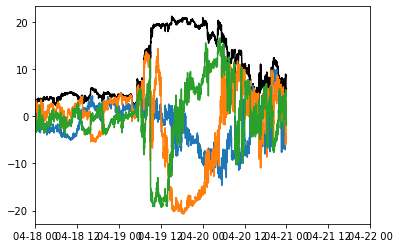

In [19]:
%matplotlib inline
#file=data_path+'solo_2020_icme_april_rtn.p'
file=data_path+'solo_2020_icme_april_rtn.p'
#file=data_path+'solo_2020_april_august_rtn.p'
o=pickle.load(open(file, "rb" ) )  
plt.plot(o.time,o.bt,'-k')
plt.plot(o.time,o.bx)
plt.plot(o.time,o.by)
plt.plot(o.time,o.bz)

plt.xlim([datetime.datetime(2020,4,18),datetime.datetime(2020,4,22)])

## read non public SOLO cdf data for May event

get data
['data/solo_mag/event2/solo_L2_mag-rtn-normal-1-minute-formagonly_20200527_V01.cdf', 'data/solo_mag/event2/solo_L2_mag-rtn-normal-1-minute-formagonly_20200528_V01.cdf', 'data/solo_mag/event2/solo_L2_mag-rtn-normal-1-minute-formagonly_20200529_V01.cdf', 'data/solo_mag/event2/solo_L2_mag-rtn-normal-1-minute-formagonly_20200530_V01.cdf', 'data/solo_mag/event2/solo_L2_mag-rtn-normal-1-minute-formagonly_20200531_V01.cdf', 'data/solo_mag/event2/solo_L2_mag-rtn-normal-1-minute-formagonly_20200601_V01.cdf', 'data/solo_mag/event2/solo_L2_mag-rtn-normal-1-minute-formagonly_20200602_V01.cdf', 'data/solo_mag/event2/solo_L2_mag-rtn-normal-formagonly_20200527_V01.cdf', 'data/solo_mag/event2/solo_L2_mag-rtn-normal-formagonly_20200528_V01.cdf', 'data/solo_mag/event2/solo_L2_mag-rtn-normal-formagonly_20200529_V01.cdf', 'data/solo_mag/event2/solo_L2_mag-rtn-normal-formagonly_20200530_V01.cdf', 'data/solo_mag/event2/solo_L2_mag-rtn-normal-formagonly_20200531_V01.cdf', 'data/solo_mag/event2/solo_

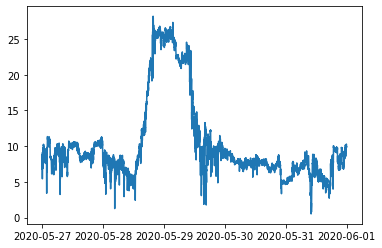

In [20]:
#normal time resolution
#DATAPATH = "/nas/helio/data/SolarOrbiter/MAG/level2/mag_rtn_norm"

#1 minute time resolution
DATAPATH = "data/solo_mag/event2"

#time for 5 days
days1=5
#with tz
#time = [datetime.datetime(2020, 5, 27,tzinfo=datetime.timezone.utc) + datetime.timedelta(minutes=i) for i in range(days1 * 24 * 60 )]
time = [datetime.datetime(2020, 5, 27) + datetime.timedelta(minutes=i) for i in range(days1 * 24 * 60 )]

time_mat=mdates.date2num(time) 

#_, b_soio = SOIO_EXT().get_data(t_soio, "mag", frame="HEEQ")

# t_soio = [datetime.datetime(2020, 5, 27) + datetime.timedelta(hours=i) for i in range(24 * 7)]
# _, b_soio = SOIO_EXT().get_data(t_soio, "mag", frame="HEEQ", cache=True, smoothing="kernel",
#                                 smoothing_scale=240, remove_nans=True)

print('get data')
t2, b_soio = SOLO_EXT().get_data(time, "mag")#,frame="HEEQ")
t1=parse_time(t2,format='unix').datetime


tm_mat=mdates.date2num(t1) 

smag=np.zeros(np.size(time),dtype=[('time',object),('bx', float),('by', float),\
        ('bz', float),('bt', float),\
        ('vt', float),('np', float), ('tp', float),\
                                   ('x', float),('y', float),('z', float),\
        ('r', float),('lat', float),('lon', float)])  
smag = smag.view(np.recarray) 


smag.time=time

print('interpolate')
smag.bx = np.interp(time_mat, tm_mat, b_soio[:, 0])
smag.by = np.interp(time_mat, tm_mat, b_soio[:, 1])
smag.bz = np.interp(time_mat, tm_mat, b_soio[:, 2])
smag.bt =np.sqrt(smag.bx**2+smag.by**2+smag.bz**2)


print('Solo position')

solo_pos=heliosat.SOLO().trajectory(smag.time, frame="HEEQ")
smag.x=solo_pos[:,0]
smag.y=solo_pos[:,1]
smag.z=solo_pos[:,2]
[smag.r, smag.lat, smag.lon]=hd.cart2sphere(solo_pos[:,0],solo_pos[:,1],solo_pos[:,2])
smag.lon=np.rad2deg(smag.lon) #convert to degree
smag.lat=np.rad2deg(smag.lat)

print('done')
plt.plot(smag.time,smag.bt)

In [21]:
#------------------------------------- save

filemag=data_path+'solo_2020_icme_may_rtn.p'
pickle.dump(smag, open(filemag, "wb"))


solo_sceq=hd.convert_RTN_to_SCEQ(smag,'SolO')
filemag=data_path+'solo_2020_icme_may_sceq.p'
pickle.dump(solo_sceq, open(filemag, "wb"))


solo_heeq=hd.convert_RTN_to_HEEQ(smag,'SolO')
filemag=data_path+'solo_2020_icme_may_heeq.p'
pickle.dump(solo_heeq, open(filemag, "wb"))


solo_gse=hd.convert_HEEQ_to_GSE(solo_heeq)
filemag=data_path+'solo_2020_icme_may_gse.p'
pickle.dump(solo_gse, open(filemag, "wb"))

print('done')

RTN to SCEQ
conversion RTN to HEEQ
conversion RTN to HEEQ done
conversion HEEQ to GSE
conversion HEEQ to GSE done
done


## Merge different data files RTN

SolO science data merging
solo merging done


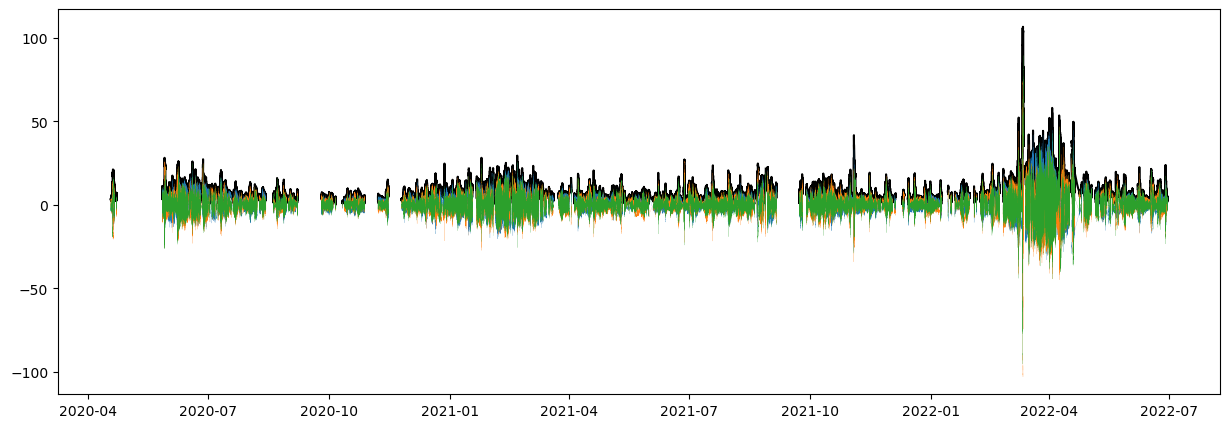

In [12]:


fname2='solo_2020_april_2022_june'


%matplotlib inline

print('SolO science data merging')

filesolo0="solo_2020_icme_april_rtn.p"
solo0=pickle.load(open(data_path+filesolo0, "rb" ) )  

filesolo1="solo_2020_icme_may_rtn.p" 
solo1=pickle.load(open(data_path+filesolo1, "rb" ) )  

filesolo2=fname+'_rtn.p' 
solo2=pickle.load(open(data_path+filesolo2, "rb" ) )  


#make array
solo=np.zeros(np.size(solo0.time)+np.size(solo1.time)+np.size(solo2.time),dtype=[('time',object),('bx', float),('by', float),\
            ('bz', float),('bt', float),('vt', float),('np', float),('tp', float),\
            ('x', float),('y', float),('z', float),\
            ('r', float),('lat', float),('lon', float)])   

#convert to recarray
solo = solo.view(np.recarray)  
solo.time=np.hstack((solo0.time,solo1.time,solo2.time))
solo.bx=np.hstack((solo0.bx,solo1.bx,solo2.bx))
solo.by=np.hstack((solo0.by,solo1.by,solo2.by))
solo.bz=np.hstack((solo0.bz,solo1.bz,solo2.bz))
solo.bt=np.hstack((solo0.bt,solo1.bt,solo2.bt))
solo.vt=np.hstack((solo0.vt,solo1.vt,solo2.vt))
solo.np=np.hstack((solo0.np,solo1.np,solo2.np))
solo.tp=np.hstack((solo0.tp,solo1.tp,solo2.tp))
solo.x=np.hstack((solo0.x,solo1.x,solo2.x))
solo.y=np.hstack((solo0.y,solo1.y,solo2.y))
solo.z=np.hstack((solo0.z,solo1.z,solo2.z))
solo.r=np.hstack((solo0.r,solo1.r,solo2.r))
solo.lon=np.hstack((solo0.lon,solo1.lon,solo2.lon))
solo.lat=np.hstack((solo0.lat,solo1.lat,solo2.lat))


################ 
file=fname2+'_rtn.p'


pickle.dump(solo, open(data_path+file, "wb"))
print('solo merging done')

solo1=pickle.load(open(data_path+file, "rb" ) )  

plt.figure(1,dpi=100)
#plt.plot(solo1.time,solo1.vt)
plt.plot(solo1.time,solo1.bt,'-k')
plt.plot(solo1.time,solo1.bx,lw=0.1)
plt.plot(solo1.time,solo1.by,lw=0.1)
plt.plot(solo1.time,solo1.bz,lw=0.1)

## Merge different data files SCEQ

SolO science data merging
solo merging done


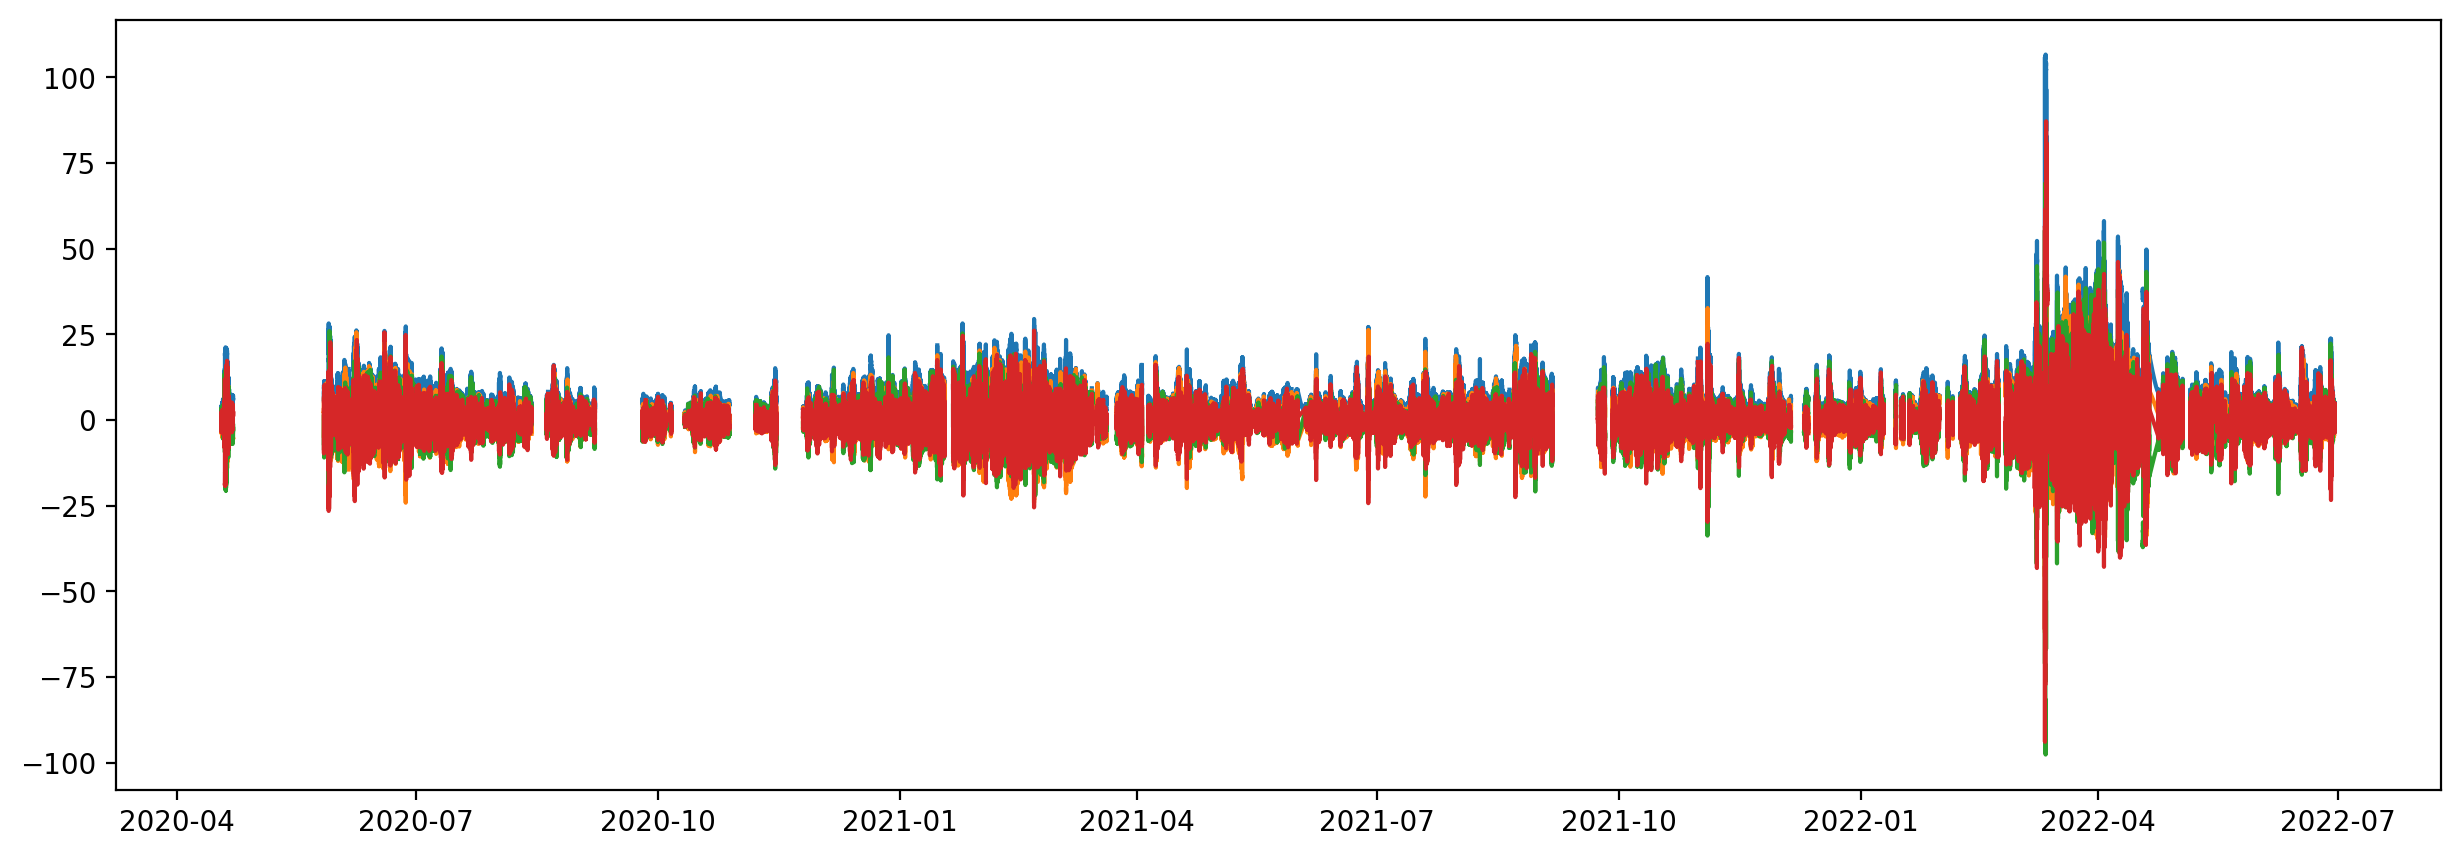

In [13]:

%matplotlib inline

print('SolO science data merging')

filesolo0="solo_2020_icme_april_sceq.p"
solo0=pickle.load(open(data_path+filesolo0, "rb" ) )  

filesolo1="solo_2020_icme_may_sceq.p" 
solo1=pickle.load(open(data_path+filesolo1, "rb" ) )  

filesolo2=fname+'_sceq.p' 
solo2=pickle.load(open(data_path+filesolo2, "rb" ) )  


#make array
solo=np.zeros(np.size(solo0.time)+np.size(solo1.time)+np.size(solo2.time),dtype=[('time',object),('bx', float),('by', float),\
            ('bz', float),('bt', float),('vt', float),('np', float),('tp', float),\
            ('x', float),('y', float),('z', float),\
            ('r', float),('lat', float),('lon', float)])   

#convert to recarray
solo = solo.view(np.recarray)  
solo.time=np.hstack((solo0.time,solo1.time,solo2.time))
solo.bx=np.hstack((solo0.bx,solo1.bx,solo2.bx))
solo.by=np.hstack((solo0.by,solo1.by,solo2.by))
solo.bz=np.hstack((solo0.bz,solo1.bz,solo2.bz))
solo.bt=np.hstack((solo0.bt,solo1.bt,solo2.bt))
solo.vt=np.hstack((solo0.vt,solo1.vt,solo2.vt))
solo.np=np.hstack((solo0.np,solo1.np,solo2.np))
solo.tp=np.hstack((solo0.tp,solo1.tp,solo2.tp))
solo.x=np.hstack((solo0.x,solo1.x,solo2.x))
solo.y=np.hstack((solo0.y,solo1.y,solo2.y))
solo.z=np.hstack((solo0.z,solo1.z,solo2.z))
solo.r=np.hstack((solo0.r,solo1.r,solo2.r))
solo.lon=np.hstack((solo0.lon,solo1.lon,solo2.lon))
solo.lat=np.hstack((solo0.lat,solo1.lat,solo2.lat))

file=fname2+'_sceq.p'
pickle.dump(solo, open(data_path+file, "wb"))
print('solo merging done')


solo1=pickle.load(open(data_path+file, "rb" ) )  


plt.figure(1,dpi=200)
#plt.plot(solo1.time,solo1.vt)
plt.plot(solo1.time,solo1.bt)
plt.plot(solo1.time,solo1.bx)
plt.plot(solo1.time,solo1.by)
plt.plot(solo1.time,solo1.bz)





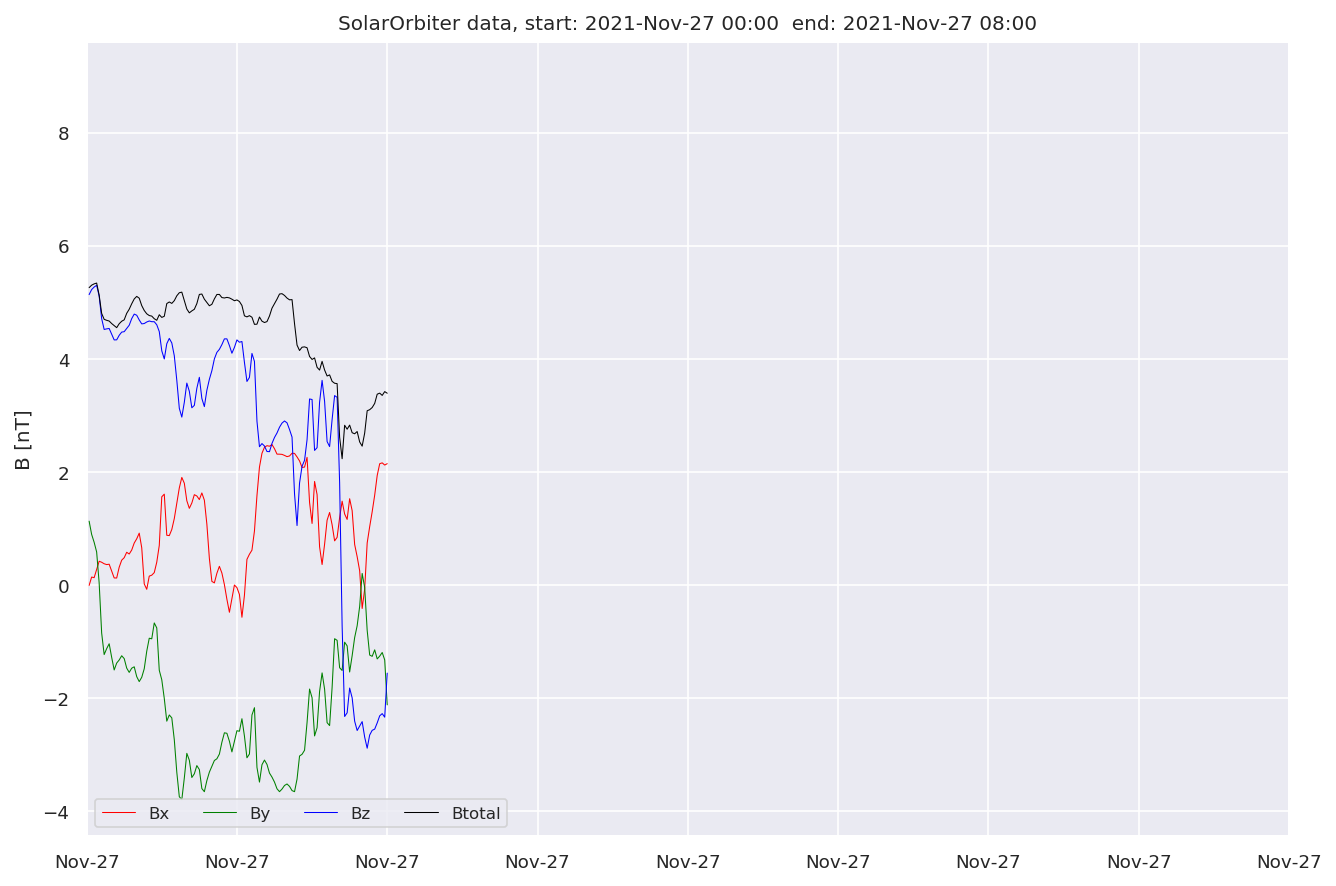

In [14]:
from heliocats import plot as hp
importlib.reload(hp) #reload again while debugging

%matplotlib inline

hp.plot_insitu_measure_mag_notz(solo1, '2021-Nov-27 00:00','2021-Nov-27 08:00', 'SolarOrbiter', 'results/plots_icmecat/')
       
        

## checks

In [15]:
#consistency check RTN to HEEQ to RTN - works!
from heliocats import data as hd
importlib.reload(hd) #reload again while debugging

filemag=data_path+'solo_2020_june_july_rtn.p'
solortn=pickle.load(open(filemag, "rb" ) ) 

soloheeq=hd.convert_RTN_to_HEEQ(solortn,'Solo')

solortnc=hd.convert_HEEQ_to_RTN(soloheeq)

FileNotFoundError: [Errno 2] No such file or directory: '/nas/helio/data/insitu_python/solo_2020_june_july_rtn.p'

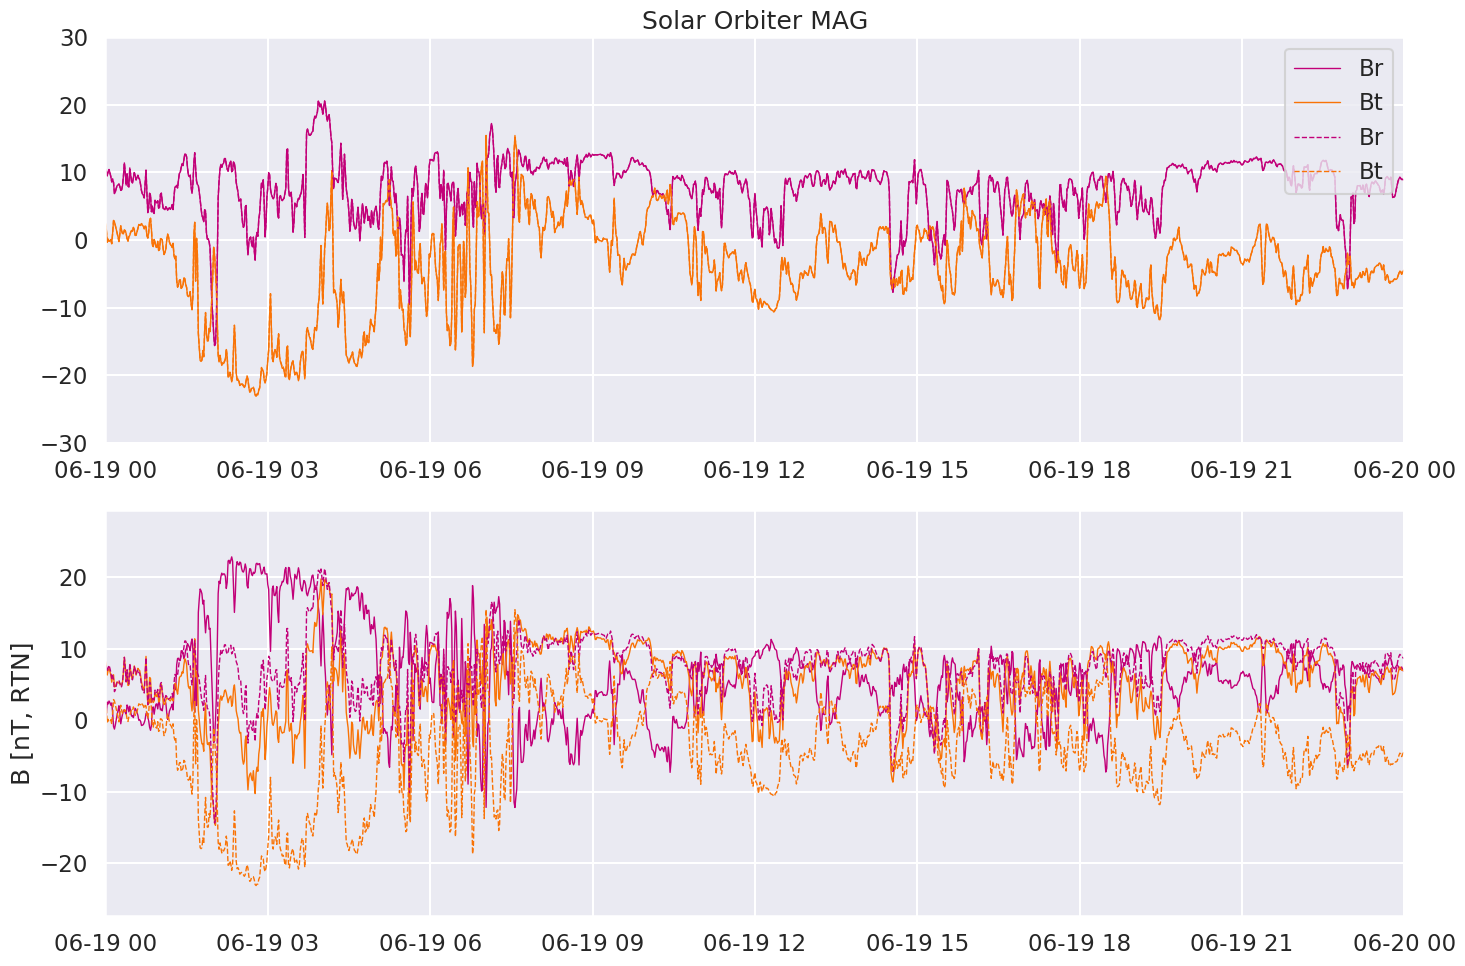

In [15]:
filemag=data_path+'solo_2020_june_july_sceq.p'
solosceq=pickle.load(open(filemag, "rb" ) )

filemag=data_path+'solo_2020_june_july_heeq.p'
soloheeq=pickle.load(open(filemag, "rb" ) )


%matplotlib inline
sns.set_context("talk")     
sns.set_style('darkgrid')

plt.figure(1,figsize=(15, 10),dpi=100)

ax = plt.subplot(211)
plt.title('Solar Orbiter MAG')

##              1 check for rtn to heeq to rtn
#ax.plot(solortn.time, solortn.bt, "k-", lw=1, label='Btotal')
ax.plot(solortn.time, solortn.bx, "r-", color="xkcd:magenta", lw=1, label='Br')
ax.plot(solortn.time, solortn.by, "g-", color="xkcd:orange", lw=1,label='Bt')
#ax.plot(solortn.time, solortn.bz, "b-", color="xkcd:azure", lw=1,label='Bn')

#ax.plot(solortnc.time, solortnc.bt, "k--", lw=1, label='Btotal')
ax.plot(solortnc.time, solortnc.bx, "r--", color="xkcd:magenta", lw=1, label='Br')
ax.plot(solortnc.time, solortnc.by, "g--", color="xkcd:orange", lw=1,label='Bt')
#ax.plot(solortnc.time, solortnc.bz, "b--", color="xkcd:azure", lw=1,label='Bn')


ax1 = plt.subplot(212)

#######         check for sceq different to HEEQ, depending on longitude
#ax.plot(solortn.time, solortn.bt, "k-", lw=1, label='Btotal')
ax1.plot(soloheeq.time, soloheeq.bx, "r-", color="xkcd:magenta", lw=1, label='Br')
ax1.plot(soloheeq.time, soloheeq.by, "g-", color="xkcd:orange", lw=1,label='Bt')
#ax.plot(solortn.time, solortn.bz, "b-", color="xkcd:azure", lw=1,label='Bn')

#ax.plot(solortnc.time, solortnc.bt, "k--", lw=1, label='Btotal')
ax1.plot(solosceq.time, solosceq.bx, "r--", color="xkcd:magenta", lw=1, label='Br')
ax1.plot(solosceq.time, solosceq.by, "g--", color="xkcd:orange", lw=1,label='Bt')
#ax.plot(solortnc.time, solortnc.bz, "b--", color="xkcd:azure", lw=1,label='Bn')


plt.ylabel('B [nT, RTN]')
ax.set_ylim([-30,30])
ax.legend(loc=1)


plotsolort=datetime.datetime(2020, 6, 19)
plotend=datetime.datetime(2020, 6,20)
ax.set_xlim(plotsolort,plotend)
ax1.set_xlim(plotsolort,plotend)

plt.tight_layout()



check heeq to gse - works


In [26]:
from heliocats import data as hd
importlib.reload(hd) #reload again while debugging

filewin=data_path+'wind_2018_2020_oct_gse.p'
[wing,hwin]=pickle.load(open(filewin, "rb" ) )

filewin=data_path+'wind_2018_2020_oct_heeq.p'
[winq,hwin]=pickle.load(open(filewin, "rb" ) )

win2=hd.convert_HEEQ_to_GSE(winq)

conversion HEEQ to GSE
conversion HEEQ to GSE done


6.639755737547154e-18
-1.8948446618879653e-17
-1.2780874147821885e-17


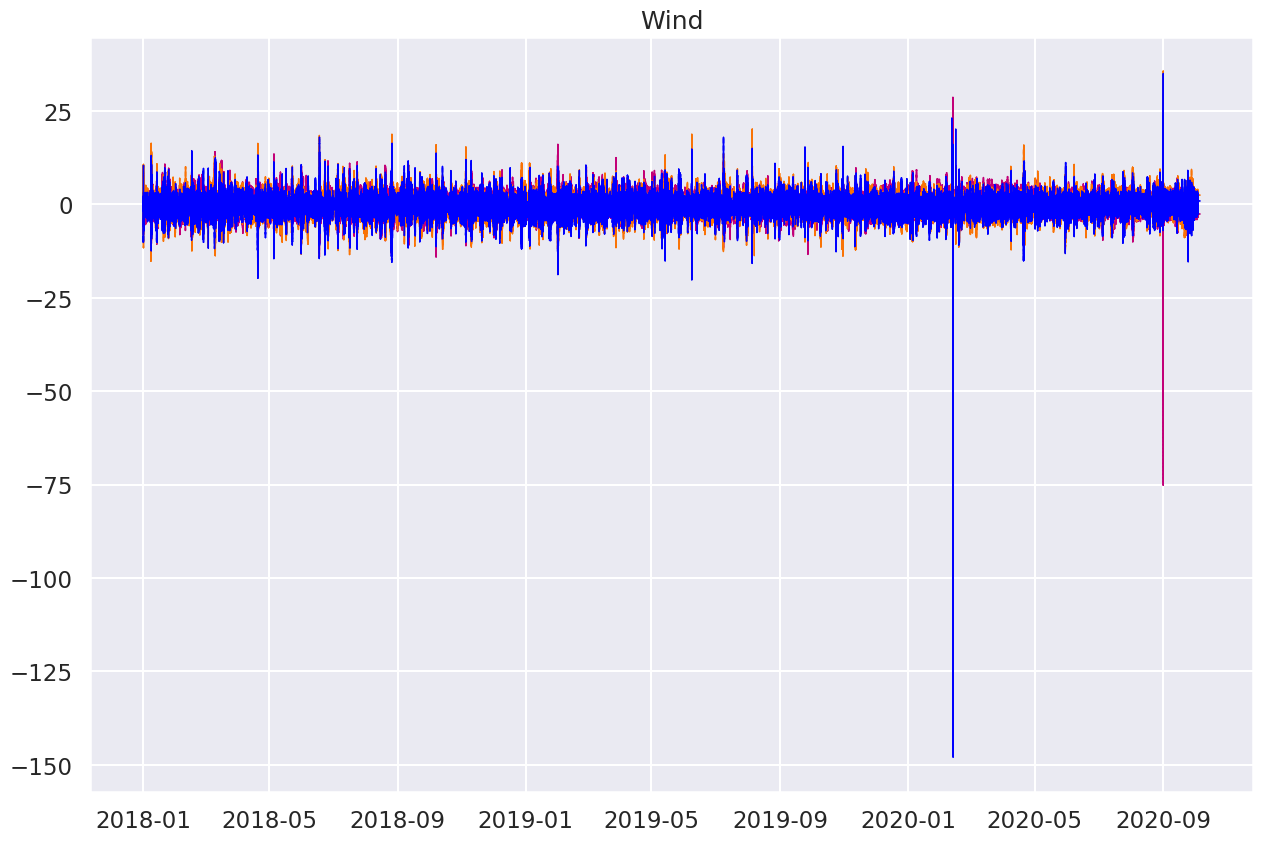

In [29]:
%matplotlib inline
sns.set_context("talk")     
sns.set_style('darkgrid')

plt.figure(1,figsize=(15, 10),dpi=100)

ax = plt.subplot(111)
plt.title('Wind')

##              1 check for gse to heeq to gse
#ax.plot(solortn.time, solortn.bt, "k-", lw=1, label='Btotal')
ax.plot(win2.time, win2.bx, "r--", color="xkcd:magenta", lw=1, label='Br HEEQ2GSE')
ax.plot(win2.time, win2.by, "g--", color="xkcd:orange", lw=1,label='Bt HEEQ2GSE')
ax.plot(win2.time, win2.bz, "b--", lw=1,label='Bn HEEQ2GSE')


#ax.plot(solortn.time, solortn.bt, "k-", lw=1, label='Btotal')
ax.plot(wing.time, wing.bx, "r-", color="xkcd:magenta", lw=1, label='Br GSE')
ax.plot(wing.time, wing.by, "g-", color="xkcd:orange", lw=1,label='Bt GSE')
ax.plot(wing.time, wing.bz, "b-", lw=1,label='Bn GSE')

print(np.nanmean(wing.bx-win2.bx))
print(np.nanmean(wing.by-win2.by))
print(np.nanmean(wing.bz-win2.bz))


## Plot all data

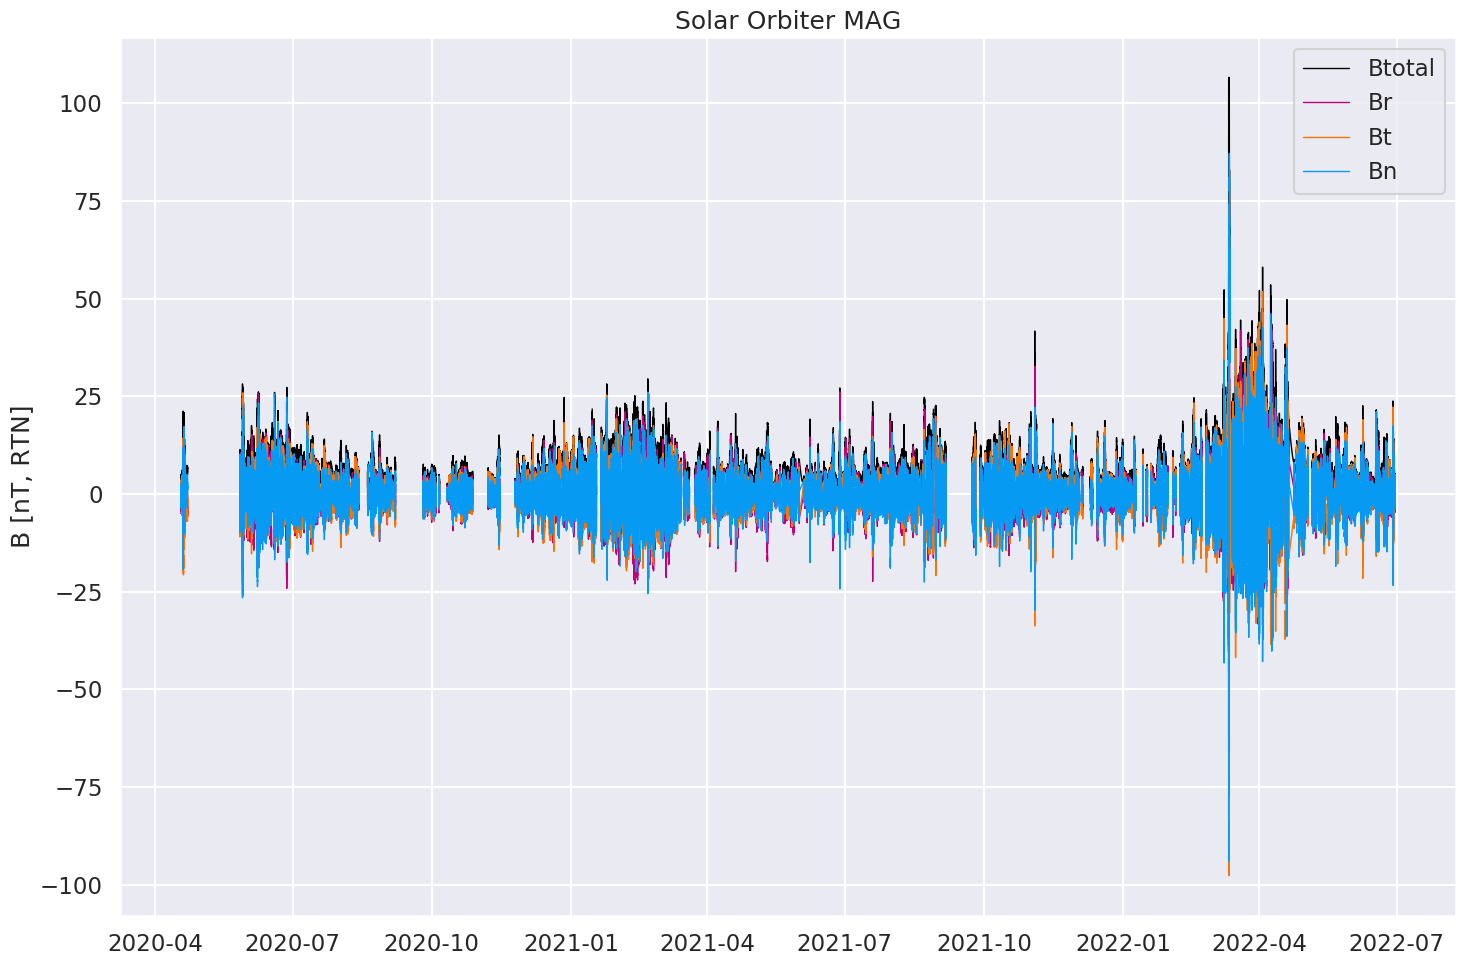

In [23]:
%matplotlib inline
#%matplotlib 


filemag=data_path+'solo_2020_april_2022_june_sceq.p'
sm=pickle.load(open(filemag, "rb" ) ) 

#filewin=data_path+'wind_2018_now_heeq.p'
#[win,hwin]=pickle.load(open(filewin, "rb" ) )

sns.set_context("talk")     
sns.set_style('darkgrid')

plt.figure(1,figsize=(15, 10),dpi=100)

ax = plt.subplot(111)
plt.title('Solar Orbiter MAG')
ax.plot(sm.time, sm.bt, "k-", lw=1, label='Btotal')
ax.plot(sm.time, sm.bx, "r-", color="xkcd:magenta", lw=1, label='Br')
ax.plot(sm.time, sm.by, "g-", color="xkcd:orange", lw=1,label='Bt')
ax.plot(sm.time, sm.bz, "b-", color="xkcd:azure", lw=1,label='Bn')
plt.ylabel('B [nT, RTN]')
#ax.set_ylim([-30,30])
ax.legend(loc=1)


plt.tight_layout()



plt.savefig('results/solo_2022_test.png',dpi=100)

## Extra event 1

In [3]:
#normal time resolution
#DATAPATH = "/nas/helio/data/SolarOrbiter/MAG/level2/mag_rtn_norm"

#1 minute time resolution
DATAPATH = "data/solo_mag/event1"


class SOIO_EXT(heliosat.SOIO):
    def get_data_files(self, *args):
        files = os.listdir(DATAPATH)
        files.sort()
        files = [os.path.join(DATAPATH, f) for f in files]
        return files, [self.get_data_version("mag", datetime.datetime.now())] * len(files)
  

a = SOIO_EXT()
#time for 7 days
time = [datetime.datetime(2020, 4, 15) + datetime.timedelta(minutes=i) for i in range(8 * 24 * 60 )]
time_mat=mdates.date2num(time) 


#_, b_soio = SOIO_EXT().get_data(t_soio, "mag", frame="HEEQ")

# t_soio = [datetime.datetime(2020, 5, 27) + datetime.timedelta(hours=i) for i in range(24 * 7)]
# _, b_soio = SOIO_EXT().get_data(t_soio, "mag", frame="HEEQ", cache=True, smoothing="kernel",
#                                 smoothing_scale=240, remove_nans=True)

print('get data')
t2, b_soio = SOIO_EXT().get_data(time, "mag")#,frame="HEEQ")
t1=parse_time(t2,format='unix').datetime
tm_mat=mdates.date2num(t1) 

smag=np.zeros(np.size(time),dtype=[('time',object),('bx', float),('by', float),\
        ('bz', float),('bt', float),\
        ('vt', float),('np', float), ('tp', float),\
                                   ('x', float),('y', float),('z', float),\
        ('r', float),('lat', float),('lon', float)])  
smag = smag.view(np.recarray) 

print('interpolate')
smag.time=time
smag.bx = np.interp(time_mat, tm_mat, b_soio[:, 0])
smag.by = np.interp(time_mat, tm_mat, b_soio[:, 1])
smag.bz = np.interp(time_mat, tm_mat, b_soio[:, 2])
smag.bt =np.sqrt(smag.bx**2+smag.by**2+smag.bz**2)


print('Solo position')
#add position
frame='HEEQ'
spice.furnish(spicedata.get_kernel('solo_2020'))
solo=spice.Trajectory('Solar Orbiter')
solo.generate_positions(smag.time, 'Sun',frame)
solo.change_units(astropy.units.AU)
[smag.r, smag.lat, smag.lon]=hd.cart2sphere(solo.x,solo.y,solo.z)

#convert to degree
smag.lat=np.rad2deg(smag.lat)
smag.lon=np.rad2deg(smag.lon)

smag.x=solo.x.value
smag.y=solo.y.value
smag.z=solo.z.value




#------------------------------------- save

filemag=data_path+'solo_2020_icme_april_rtn.p'
pickle.dump(smag, open(filemag, "wb"))


solo_sceq=hd.convert_RTN_to_SCEQ(smag,'SolO')
filemag=data_path+'solo_2020_icme_april_sceq.p'
pickle.dump(solo_sceq, open(filemag, "wb"))


solo_heeq=hd.convert_RTN_to_HEEQ(smag,'SolO')
filemag=data_path+'solo_2020_icme_april_heeq.p'
pickle.dump(solo_heeq, open(filemag, "wb"))


########### 
solo_gse=hd.convert_HEEQ_to_GSE(solo_heeq)
filemag=data_path+'solo_2020_icme_april_gse.p'
pickle.dump(solo_gse, open(filemag, "wb"))

print('done')

get data
The history saving thread hit an unexpected error (OperationalError('disk I/O error')).History will not be written to the database.
interpolate
Solo position
RTN to SCEQ
conversion RTN to HEEQ
conversion RTN to HEEQ done
conversion HEEQ to GSE
conversion HEEQ to GSE done
done


## Extra event 2

In [4]:

#normal time resolution
#DATAPATH = "/nas/helio/data/SolarOrbiter/MAG/level2/mag_rtn_norm"

#1 minute time resolution
DATAPATH = "data/solo_mag/event2"


class SOIO_EXT(heliosat.SOIO):
    def get_data_files(self, *args):
        files = os.listdir(DATAPATH)
        files.sort()
        files = [os.path.join(DATAPATH, f) for f in files]
        return files, [self.get_data_version("mag", datetime.datetime.now())] * len(files)
  

a = SOIO_EXT()
#time for 7 days
time = [datetime.datetime(2020, 5, 27) + datetime.timedelta(minutes=i) for i in range(14 * 24 * 60 )]
time_mat=mdates.date2num(time) 


#_, b_soio = SOIO_EXT().get_data(t_soio, "mag", frame="HEEQ")

# t_soio = [datetime.datetime(2020, 5, 27) + datetime.timedelta(hours=i) for i in range(24 * 7)]
# _, b_soio = SOIO_EXT().get_data(t_soio, "mag", frame="HEEQ", cache=True, smoothing="kernel",
#                                 smoothing_scale=240, remove_nans=True)

print('get data')
t2, b_soio = SOIO_EXT().get_data(time, "mag")#,frame="HEEQ")
t1=parse_time(t2,format='unix').datetime
tm_mat=mdates.date2num(t1) 

smag=np.zeros(np.size(time),dtype=[('time',object),('bx', float),('by', float),\
        ('bz', float),('bt', float),\
        ('vt', float),('np', float), ('tp', float),\
                                   ('x', float),('y', float),('z', float),\
        ('r', float),('lat', float),('lon', float)])  
smag = smag.view(np.recarray) 

print('interpolate')
smag.time=time
smag.bx = np.interp(time_mat, tm_mat, b_soio[:, 0])
smag.by = np.interp(time_mat, tm_mat, b_soio[:, 1])
smag.bz = np.interp(time_mat, tm_mat, b_soio[:, 2])
smag.bt =np.sqrt(smag.bx**2+smag.by**2+smag.bz**2)


print('Solo position')
#add position
frame='HEEQ'
spice.furnish(spicedata.get_kernel('solo_2020'))
solo=spice.Trajectory('Solar Orbiter')
solo.generate_positions(smag.time, 'Sun',frame)
solo.change_units(astropy.units.AU)
[smag.r, smag.lat, smag.lon]=hd.cart2sphere(solo.x,solo.y,solo.z)

#convert to degree
smag.lat=np.rad2deg(smag.lat)
smag.lon=np.rad2deg(smag.lon)

smag.x=solo.x.value
smag.y=solo.y.value
smag.z=solo.z.value




#------------------------------------- save

filemag=data_path+'solo_2020_icme_may_rtn.p'
pickle.dump(smag, open(filemag, "wb"))


solo_sceq=hd.convert_RTN_to_SCEQ(smag,'SolO')
filemag=data_path+'solo_2020_icme_may_sceq.p'
pickle.dump(solo_sceq, open(filemag, "wb"))


solo_heeq=hd.convert_RTN_to_HEEQ(smag,'SolO')
filemag=data_path+'solo_2020_icme_may_heeq.p'
pickle.dump(solo_heeq, open(filemag, "wb"))


solo_gse=hd.convert_HEEQ_to_GSE(solo_heeq)
filemag=data_path+'solo_2020_icme_may_gse.p'
pickle.dump(solo_gse, open(filemag, "wb"))

print('done')

get data
interpolate
Solo position
RTN to SCEQ
conversion RTN to HEEQ
conversion RTN to HEEQ done
conversion HEEQ to GSE
conversion HEEQ to GSE done
done


# old code

In [15]:
filemag='data/solo_may2020.p'
sm=pickle.load(open(filemag, "rb" ) ) 

filewin='data/wind_2018_now_gse.p'
[win,hwin]=pickle.load(open(filewin, "rb" ) )





#%matplotlib inline

#%matplotlib
#hp.plot_insitu_measure(sm, '2020-May-27 12:00','2020-Jun-2 12:00', 'Solo', 'results/')
#hp.plot_insitu_measure(win, '2020-May-27 12:00','2020-Jun-2 12:00', 'Wind', 'results/')








#solo
sicme_solort_time=parse_time('2020-05-28T12:45Z').datetime
smo_solort_time=parse_time('2020-05-28T19:44Z').datetime
smo_end_time=parse_time('2020-05-29T10:53Z').datetime

print('SolO times:',sicme_solort_time, smo_solort_time,smo_end_time)

#index of times
sicme_solort_ind=np.where(sicme_solort_time==sm.time)[0][0]
smo_solort_ind=np.where(smo_solort_time==sm.time)[0][0]
smo_end_ind=np.where(smo_end_time==sm.time)[0][0]

print('HEEQ position of SolO r/lat/lon at icme_solort_time:',np.round(sm.r[sicme_solort_ind],3),np.round(sm.lat[sicme_solort_ind],2),np.round(sm.lon[sicme_solort_ind],2))
print('HEEQ position of SolO r/lat/lon at mo_solort_time:',np.round(sm.r[smo_solort_ind],3),np.round(sm.lat[smo_solort_ind],2),np.round(sm.lon[smo_solort_ind],2))
print('HEEQ position of SolO r/lat/lon at mo_end_time:',np.round(sm.r[smo_end_ind],3),np.round(sm.lat[smo_end_ind],2),np.round(sm.lon[smo_end_ind],2))



print('SolO ICME duration hours ', np.round((smo_end_time-sicme_solort_time).total_seconds()/3600,2))
print('SolO MO duration hours ', np.round((smo_end_time-smo_solort_time).total_seconds()/3600,2))
print()

#earth
wicme_solort_time=parse_time('2020-05-29T22:12Z').datetime
wmo_solort_time=parse_time('2020-05-30T04:20Z').datetime
wmo_end_time=parse_time('2020-05-30T13:16Z').datetime

print('Wind times:',wicme_solort_time, wmo_solort_time,wmo_end_time)



print('Wind ICME duration hours ', np.round((wmo_end_time-wicme_solort_time).total_seconds()/3600,2))
print('Wind MO duration hours ', np.round((wmo_end_time-wmo_solort_time).total_seconds()/3600,2))


#index of times
wicme_solort_ind=np.where(wicme_solort_time==win.time)[0][0]
wmo_solort_ind=np.where(wmo_solort_time==win.time)[0][0]
wmo_end_ind=np.where(wmo_end_time==win.time)[0][0]

print('HEEQ position of Wind r/lat/lon at icme_solort_time:',np.round(win.r[sicme_solort_ind],3),np.round(win.lat[sicme_solort_ind],2),np.round(win.lon[sicme_solort_ind],2))
print('HEEQ position of Wind r/lat/lon at mo_solort_time:',np.round(win.r[smo_solort_ind],3),np.round(win.lat[smo_solort_ind],2),np.round(win.lon[smo_solort_ind],2))
print('HEEQ position of Wind r/lat/lon at mo_end_time:',np.round(win.r[smo_end_ind],3),np.round(win.lat[smo_end_ind],2),np.round(win.lon[smo_end_ind],2))























sns.set_context("talk")     
sns.set_style('darkgrid')

plt.figure(3,figsize=(12, 10),dpi=100)

ax = plt.subplot(211)
plt.title('Solar Orbiter MAG')
ax.plot(sm.time, sm.bt, "k-", lw=1)
ax.plot(sm.time, sm.bx, "r-", color="xkcd:magenta", lw=1, label='Bx')
ax.plot(sm.time, sm.by, "g-", color="xkcd:orange", lw=1,label='By')
ax.plot(sm.time, sm.bz, "b-", color="xkcd:azure", lw=1,label='Bz')
plt.ylabel('B [nT, RTN]')



#plot vertical lines
ax.plot_date([sicme_solort_time,sicme_solort_time],[-500,500],'-k',linewidth=1)            
ax.plot_date([smo_solort_time,smo_solort_time],[-500,500],'-k',linewidth=1)            
ax.plot_date([smo_end_time,smo_end_time],[-500,500],'-k',linewidth=1)            



plotsolort=datetime.datetime(2020, 5, 27)
plotend=datetime.datetime(2020, 6,1)
plt.xlim(plotsolort,plotend)



#position on figure
textsolort=plotsolort+datetime.timedelta(hours=2)
plt.text(textsolort,25,'HEEQ R/lat/lon: '+str(np.round(sm.r[sicme_solort_ind],3))+' ' +str(np.round(sm.lat[sicme_solort_ind],2))+'  '+\
         str(np.round(sm.lon[sicme_solort_ind],2)),fontsize=13)




plt.ylim(-30,30)



ax2 = plt.subplot(212)
plt.title('Wind MFI')
ax2.plot(win.time, -win.bx,'-r', color="xkcd:magenta",linewidth=1,label='By')
ax2.plot(win.time, -win.by, "g-", color="xkcd:orange", lw=1,label='By')
ax2.plot(win.time, win.bz, "b-", color="xkcd:azure", lw=1,label='Bz')
ax2.plot(win.time, win.bt, "k-", lw=1,label='Bt')
plt.ylabel('B [nT, HEE]')



#plot vertical lines
ax2.plot_date([wicme_solort_time,wicme_solort_time],[-500,500],'-k',linewidth=1)            
ax2.plot_date([wmo_solort_time,wmo_solort_time],[-500,500],'-k',linewidth=1)            
ax2.plot_date([wmo_end_time,wmo_end_time],[-500,500],'-k',linewidth=1)            



plotsolort=datetime.datetime(2020, 5, 27)
plotend=datetime.datetime(2020, 6,1)
plt.xlim(plotsolort,plotend)


#position on figure
textsolort=plotsolort+datetime.timedelta(hours=2)
plt.text(textsolort,25,'HEEQ R/lat/lon: '+str(np.round(win.r[wicme_solort_ind],3))+' ' +str(np.round(win.lat[wicme_solort_ind],2))+'  '+\
         str(np.round(win.lon[wicme_solort_ind],2)),fontsize=13)

plt.ylim(-30,30)



plt.ylabel('B [nT, HEE]')
plt.legend(loc=3,ncol=4)
plt.title('Wind MFI')

plt.legend(loc=3,ncol=4,fontsize=13)



plt.tight_layout()



plt.savefig('results/solo_wind_cme_may2020.png')
plt.savefig('results/solo_wind_cme_may2020.eps')



FileNotFoundError: [Errno 2] No such file or directory: 'data/solo_may2020.p'